In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [181]:
ds = pd.read_csv('Datum/Raisin_Dataset.csv')

In [202]:
# Removing Dummy Varaibles
ds = pd.get_dummies(ds, drop_first=True)
X = ds.drop('Class_Kecimen', axis=1)
y = ds['Class_Kecimen'].values.reshape(-1, 1)
# Changing NaN values to the mean of the column


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [203]:
# plt.scatter(ds['Perimeter'], train['Eccentricity'], c=y, cmap='magma', alpha=0.7)
X_train

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
467,184784,740.108710,320.587830,0.901316,192699,0.645353,1791.568
766,86202,437.771261,253.909321,0.814613,90825,0.705146,1199.809
891,107486,462.813134,296.091238,0.768571,108914,0.759967,1235.078
817,87663,405.678051,277.454931,0.729549,89710,0.743688,1126.518
186,36145,280.757653,166.593550,0.804929,37401,0.812265,747.161
...,...,...,...,...,...,...,...
575,146175,592.908505,319.020111,0.842907,149156,0.632833,1529.068
838,92619,398.620729,296.882933,0.667315,95666,0.742997,1173.390
337,83490,421.882943,254.310183,0.797894,86319,0.709949,1168.247
523,110897,518.787614,275.260505,0.847632,115550,0.730436,1365.577


/home/kobruh/PycharmProjects/pythonProject2/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kobruh/PycharmProjects/pythonProject2/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kobruh/PycharmProjects/pythonProject2/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but LinearSVC is expecting 7 features as input.

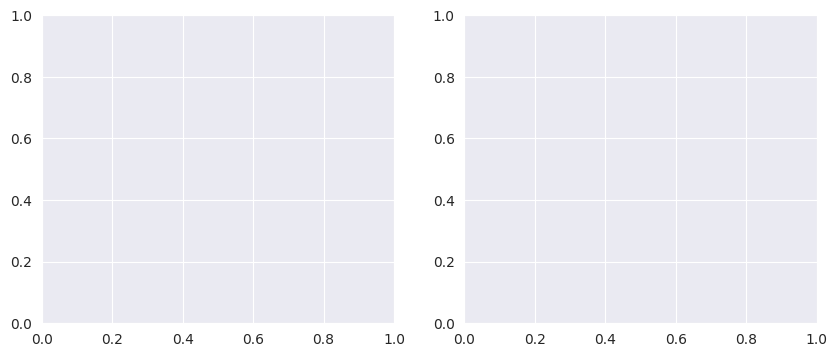

In [206]:
# Generate a grid of points to evaluate the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train['Perimeter'].min(), X_train['Perimeter'].max(), 500),
                     np.linspace(X_train['Eccentricity'].min(), X_train['Eccentricity'].max(), 500))
grid = np.c_[xx.ravel(), yy.ravel()]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Get predictions on the grid of points
    Z = clf.predict(grid)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap='tab20', alpha=0.3)  # Plot decision boundary
    ax.scatter(X_train['Perimeter'], X_train['Eccentricity'], c=y_train, cmap='tab20', alpha=0.7)
    ax.set_xlabel('Perimeter')
    ax.set_ylabel('Eccentricity')
    ax.set_title(f'{model.__class__.__name__}, score: {score:.3f}')
    plt.legend("Kecimen")

plt.tight_layout()
plt.show()

# COMMENT!

/home/kobruh/PycharmProjects/pythonProject2/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kobruh/PycharmProjects/pythonProject2/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kobruh/PycharmProjects/pythonProject2/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kobruh/PycharmProjects/pythonProject2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. o

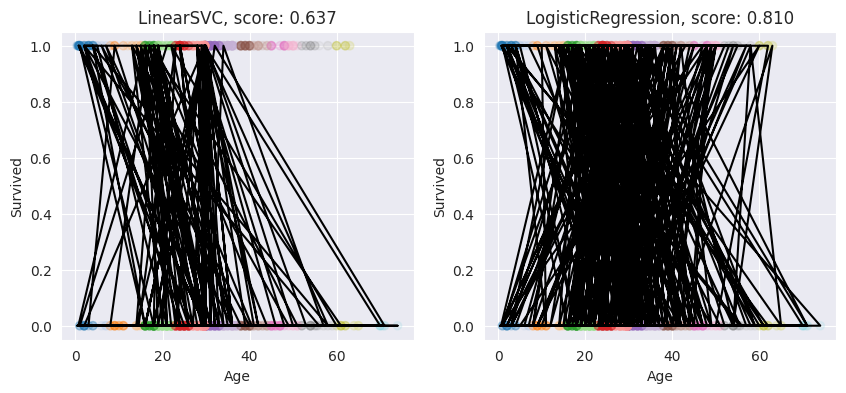

In [78]:
from sklearn.svm import LinearSVC

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X_ds, y_train)
    score = clf.score(X_test, y_test)
    ax.scatter(X_ds['Age'], y_train, c=X_train['Age'], cmap='tab20', alpha=0.2)
    ax.plot(X_ds['Age'], clf.predict(X_train), 'k')
    ax.set_xlabel('Age')
    ax.set_ylabel('Survived')
    ax.set_title(f'{model.__class__.__name__}, score: {score:.3f}')
plt.show()

In [207]:

ds

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class_Kecimen
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,True
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,True
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,True
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,True
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,True
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,False
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,False
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,False
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,False


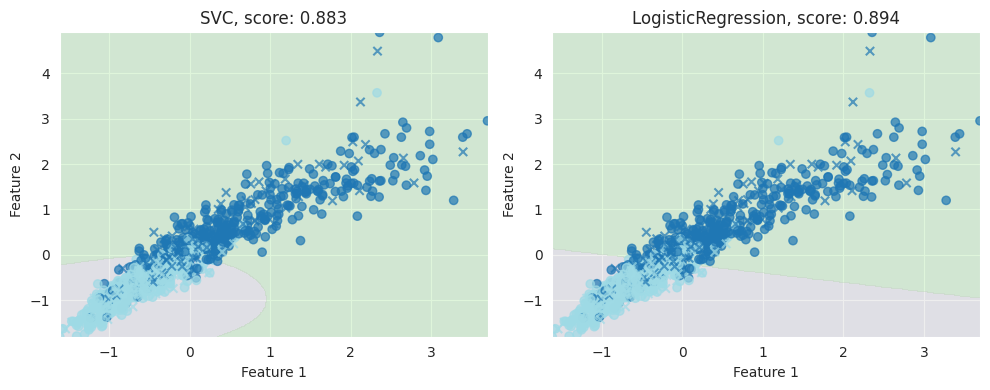

In [211]:
# Holy Moly ChatGPT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Read the dataset
ds = pd.read_csv('Datum/Raisin_Dataset.csv')

# Removing Dummy Variables
ds = pd.get_dummies(ds, drop_first=True)
X = ds.drop('Class_Kecimen', axis=1)
y = ds['Class_Kecimen']

# Select two features for plotting
X_selected = X.iloc[:, :2]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=101)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Generate a grid of points to evaluate the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 500),
                     np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 500))
grid = np.c_[xx.ravel(), yy.ravel()]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for model, ax in zip([SVC(), LogisticRegression()], axes):
    # Train the model
    clf = model.fit(X_train_scaled, y_train)
    score = clf.score(X_test_scaled, y_test)

    # Get predictions on the grid of points
    Z = clf.predict(grid)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, cmap='tab20', alpha=0.3)

    # Plot training data
    ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='tab20', alpha=0.7)

    # Plot test data
    ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='tab20', alpha=0.7, marker='x')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'{model.__class__.__name__}, score: {score:.3f}')

plt.tight_layout()
plt.show()


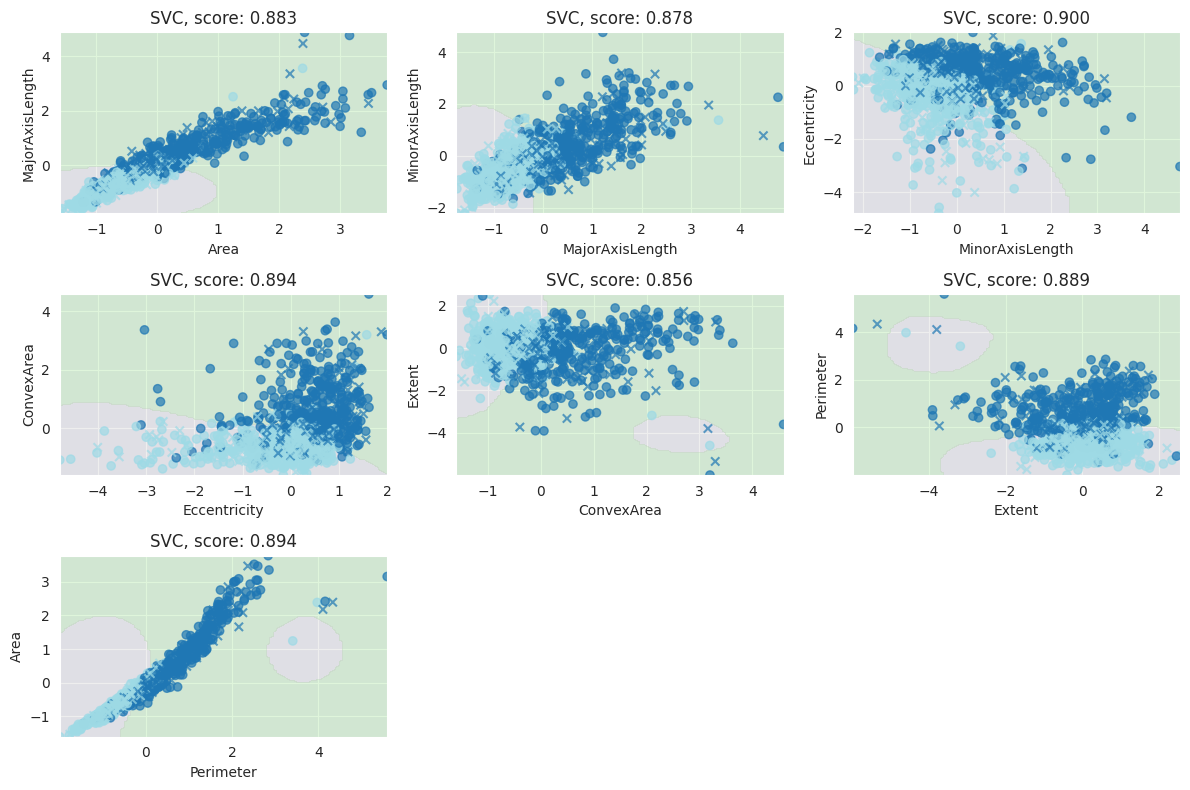

In [213]:
# Holy Moly ChatGPT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Read the dataset
ds = pd.read_csv('Datum/Raisin_Dataset.csv')

# Removing Dummy Variables
ds = pd.get_dummies(ds, drop_first=True)
X = ds.drop('Class_Kecimen', axis=1)
y = ds['Class_Kecimen']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

# Generate a grid of points to evaluate the decision boundaries
n_features = X_train.shape[1]
resolution = 100
plot_cols = 3
plot_rows = int(np.ceil(n_features / plot_cols))

fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

for i, ax in enumerate(axes.flatten()):
    if i < n_features:
        # Select two features for plotting
        feature1_index = i
        feature2_index = (i + 1) % n_features

        # Get feature names for labeling
        feature1_name = X.columns[feature1_index]
        feature2_name = X.columns[feature2_index]

        # Train the model
        model = SVC()
        clf = model.fit(X_train[:, [feature1_index, feature2_index]], y_train)
        score = clf.score(X_test[:, [feature1_index, feature2_index]], y_test)

        # Generate a grid of points to evaluate the decision boundary
        xx, yy = np.meshgrid(np.linspace(X_scaled[:, feature1_index].min(), X_scaled[:, feature1_index].max(), resolution),
                             np.linspace(X_scaled[:, feature2_index].min(), X_scaled[:, feature2_index].max(), resolution))
        grid = np.c_[xx.ravel(), yy.ravel()]

        # Get predictions on the grid of points
        Z = clf.predict(grid)
        Z = Z.reshape(xx.shape)

        # Plot decision boundary
        ax.contourf(xx, yy, Z, cmap='tab20', alpha=0.3)

        # Plot training data
        ax.scatter(X_train[:, feature1_index], X_train[:, feature2_index], c=y_train, cmap='tab20', alpha=0.7)

        # Plot test data
        ax.scatter(X_test[:, feature1_index], X_test[:, feature2_index], c=y_test, cmap='tab20', alpha=0.7, marker='x')

        # Set labels and title
        ax.set_xlabel(feature1_name)
        ax.set_ylabel(feature2_name)
        ax.set_title(f'SVC, score: {score:.3f}')

    else:
        ax.axis('off')  # Hide empty subplots if there are extra spaces

plt.tight_layout()
plt.show()